<a href="https://colab.research.google.com/github/Agrover112/SiameseNet-Search/blob/main/InferenceSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random



print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.3.0


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train:",x_train.shape,"Y_train:",y_train.shape,"X_test:",x_test.shape,"Y_test:",y_test.shape)

X_train: (60000, 28, 28) Y_train: (60000,) X_test: (10000, 28, 28) Y_test: (10000,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
new_model = tf.keras.models.load_model('/content/embedding_model.h5')

In [ ]:
embeddings=new_model.predict(x_train)

In [ ]:
!pip install annoy

In [ ]:
import annoy
class AnnoyIndex():
    def __init__(self, vectors, labels):
        self.dimension = vectors.shape[1]
        self.vectors = vectors.astype('float32')
        self.labels = labels    
   
    def build(self, number_of_trees=128):
        self.index = annoy.AnnoyIndex(self.dimension,metric='euclidean')
        for i, vec in enumerate(self.vectors):
            self.index.add_item(i, vec.tolist())
        self.index.build(number_of_trees)
        return self.index
        
    def query(self, vector, k=10):
        dist = self.index.get_nns_by_vector(
              vector.tolist(), 
              k,
              include_distances=True) 
        return dist                                         
        #return [self.labels[i] for i in indices]

In [ ]:
%%time
index = AnnoyIndex(embeddings,y_train)
clsindex=index.build()

CPU times: user 9.51 s, sys: 25.8 ms, total: 9.54 s
Wall time: 5.01 s


In [ ]:
%%time
clsindex.save('mnist.ann')
clsindex.load('mnist.ann')

CPU times: user 0 ns, sys: 78 ms, total: 78 ms
Wall time: 78 ms


In [ ]:
y_train[0,]

5

In [ ]:


v=index.query(embeddings[0,])

In [ ]:
index.labels[0]

5

In [ ]:
v[1]

[0.0,
 0.6113713979721069,
 0.7337702512741089,
 0.739129364490509,
 0.7395821213722229,
 0.7434507608413696,
 0.7733906507492065,
 0.7802317142486572,
 0.7946605682373047,
 0.8195652961730957]

Similarity score: 0.0


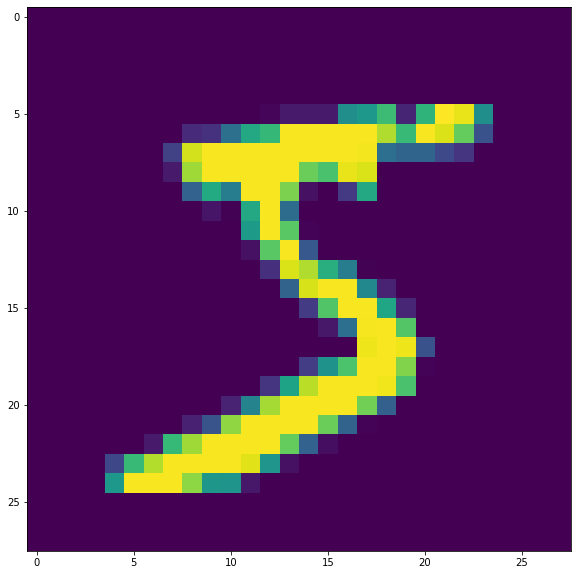

Similarity score: 0.6113713979721069


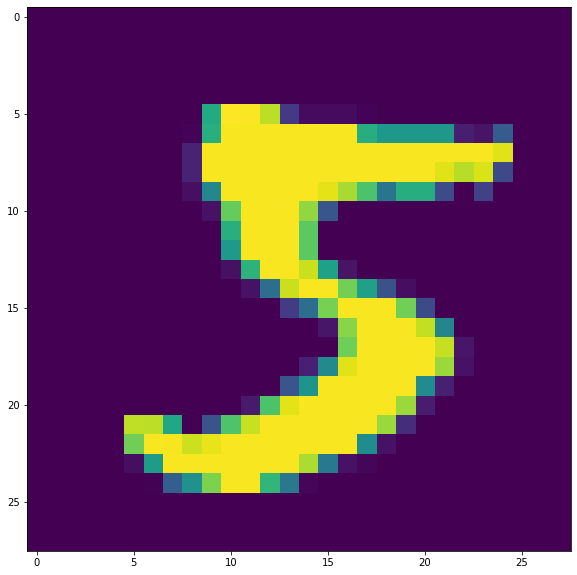

Similarity score: 0.7337702512741089


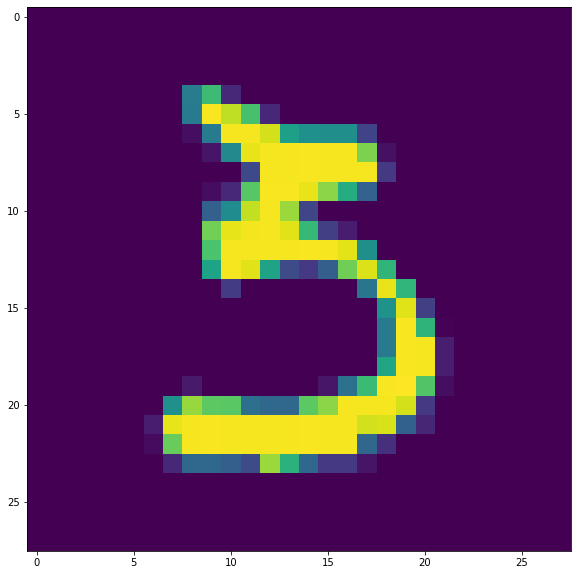

Similarity score: 0.739129364490509


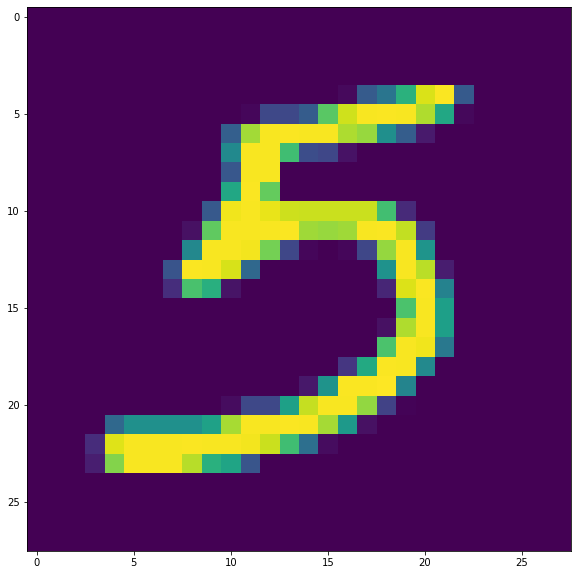

Similarity score: 0.7395821213722229


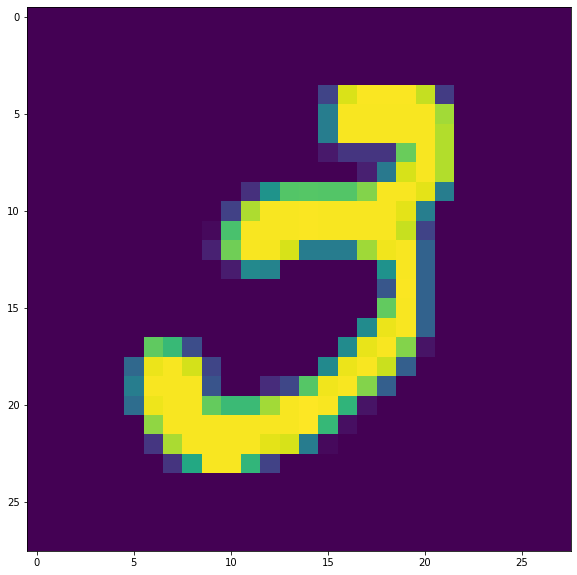

Similarity score: 0.7434507608413696


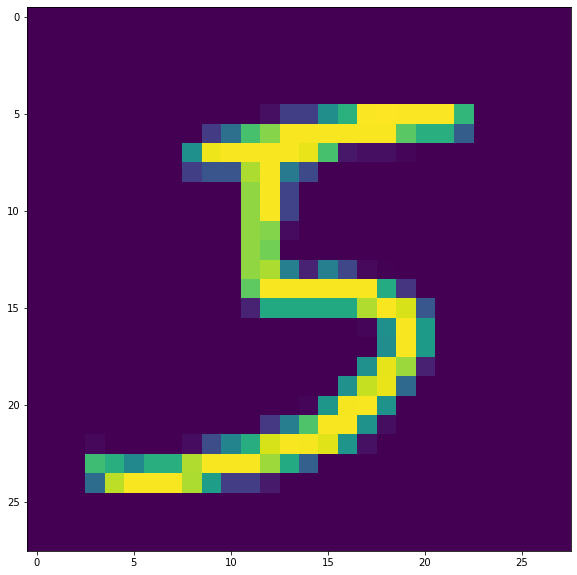

Similarity score: 0.7733906507492065


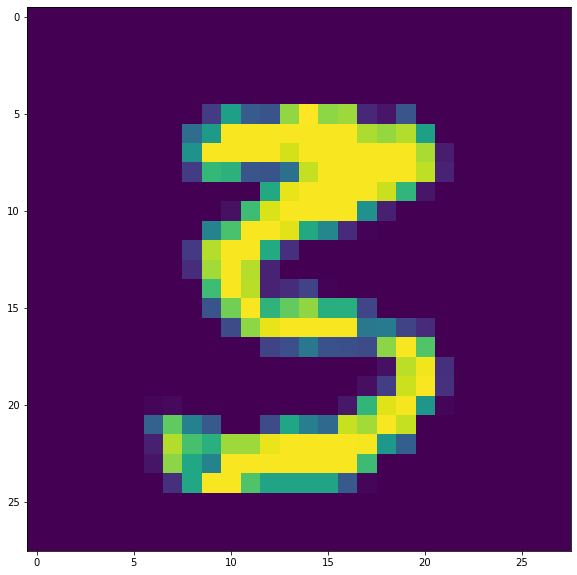

Similarity score: 0.7802317142486572


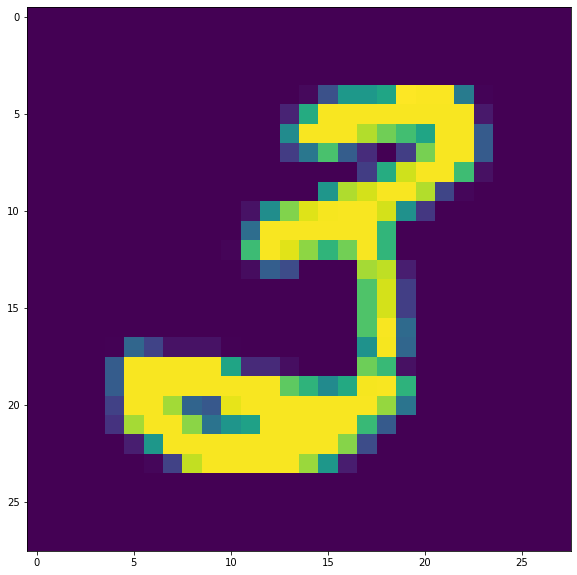

Similarity score: 0.7946605682373047


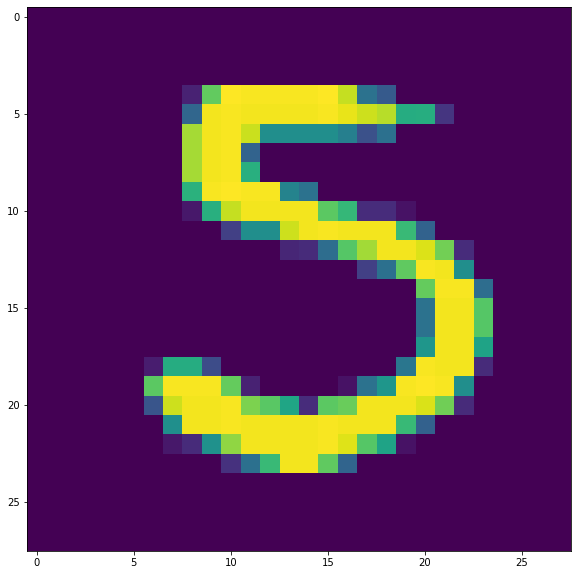

Similarity score: 0.8195652961730957


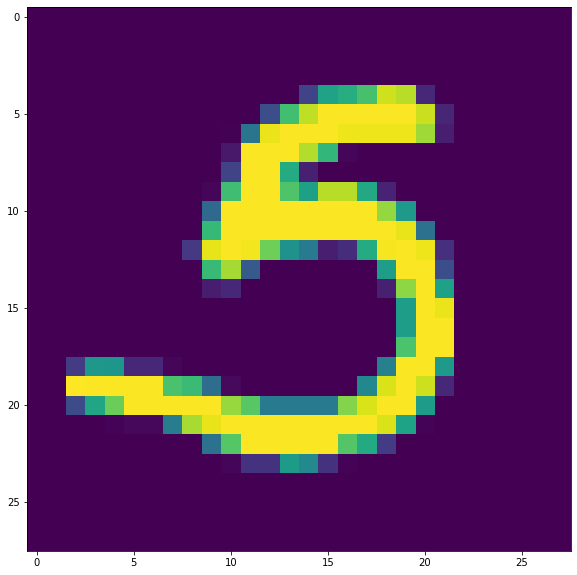

In [ ]:
for i in range(10):
    print("Similarity score: "+str(v[1][i]))

    plt.figure(figsize=(10, 10))
    plt.imshow(np.reshape(x_train[v[0][i]], (28,28) ))
    plt.show()